In [17]:
%reset -f

import pandas as pd
import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [18]:
seed = 1
print("Seed value: ", seed)

Seed value:  1


#### Method 1 : predict y_train et y_test des énergies

In [19]:
all_energy_dir = ["steam", "electricity", "gas", "total_energy"]
all_energy_names = ["Log-SteamUse(kBtu)", "Log-Electricity(kBtu)", "Log-NaturalGas(kBtu)", "Log-TotalEnergy(kBtu)"]

train_energy_file = "./dataset/cleaned/energy/train_energy.csv"
train_energy = pd.read_csv(train_energy_file, sep=",")
X_train_energy = train_energy.iloc[:, :-4]

test_energy_file = "./dataset/cleaned/energy/test_energy.csv"
test_energy = pd.read_csv(test_energy_file, sep=",")
X_test_energy = test_energy.iloc[:, :-4]

for index, energy_dir in enumerate(all_energy_dir):

    # we load each best model for each energy features
    filename = 'model/{}/best_model_{}.sav'.format(energy_dir, energy_dir)
    best_model_energy = pickle.load(open(filename, 'rb'))

    y_pred_train_energy = best_model_energy.predict(X_train_energy)
    series_y_pred_train = pd.Series(y_pred_train_energy)
    # we put into one Series the prediction of the train set and test set
    df_pred_train = pd.DataFrame(series_y_pred_train, columns=[all_energy_names[index]])
    #display(df_pred_train) # OK

    y_pred_test_energy = best_model_energy.predict(X_test_energy)
    series_y_pred_test = pd.Series(y_pred_test_energy)
    df_pred_test = pd.DataFrame(series_y_pred_test, columns=[all_energy_names[index]])
    #display(df_pred_test) # OK

    df = pd.concat([df_pred_train, df_pred_test])

    if index == 0:
        df_energy = pd.DataFrame({})
    df_energy = pd.concat([df_energy, df], axis=1)

display(df_energy)

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu)
0,13.715364,14.952680,13.346070,15.732227
1,0.917257,15.282577,13.938305,15.719900
2,13.036413,17.329882,14.800173,17.833543
3,0.783009,15.225394,11.130920,15.766363
4,11.624198,15.137360,9.830969,15.771748
...,...,...,...,...
940,0.133221,15.316434,13.046241,15.497899
941,0.092985,14.381962,11.258708,14.778462
942,0.167248,16.370810,15.170986,16.524748
943,0.000000,15.250117,13.198343,15.456096


In [20]:
train_CO2_file = "./dataset/cleaned/CO2/train_CO2.csv"
test_CO2_file = "./dataset/cleaned/CO2/test_CO2.csv"

train = pd.read_csv(train_CO2_file, sep=",")
test = pd.read_csv(test_CO2_file, sep=",")

target = "Log-TotalGHGEmissions"

y_train = train[target]
y_test = test[target]

series_y_train = pd.Series(y_train)
df_train = pd.DataFrame(series_y_train, columns=[target])

series_y_test = pd.Series(y_test)
df_test = pd.DataFrame(series_y_test, columns=[target])

In [21]:
display(df_train)
display(df_test)

,Log-TotalGHGEmissions
0,2.299581
1,2.005526
2,1.706565
3,3.453474
4,4.777357
...,...
2197,2.344686
2198,3.559625
2199,3.080992
2200,4.328494


,Log-TotalGHGEmissions
0,4.248209
1,3.357245
2,3.529297
3,3.352007
4,5.660979
...,...
940,2.233235
941,2.326302
942,5.449965
943,3.576550


In [22]:
df = pd.concat([df_train, df_test])
dataset = pd.concat([df_energy, df], axis=1)

display(dataset)

,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
0,13.715364,14.952680,13.346070,15.732227,2.299581
1,0.917257,15.282577,13.938305,15.719900,2.005526
2,13.036413,17.329882,14.800173,17.833543,1.706565
3,0.783009,15.225394,11.130920,15.766363,3.453474
4,11.624198,15.137360,9.830969,15.771748,4.777357
...,...,...,...,...,...
940,0.133221,15.316434,13.046241,15.497899,2.233235
941,0.092985,14.381962,11.258708,14.778462,2.326302
942,0.167248,16.370810,15.170986,16.524748,5.449965
943,0.000000,15.250117,13.198343,15.456096,3.576550


#### Method  : predict y des énergies X

In [23]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset, test_size=0.3,  random_state=seed)

In [24]:
# liste des variables et étiquettes
model_CO2_target = ['Log-TotalGHGEmissions']
model_CO2_features = ['Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Log-TotalEnergy(kBtu)']
model_CO2 = model_CO2_features + model_CO2_target

In [25]:
# Selection des variables pour modélisation CO2
train_CO2, test_CO2 = train_common[model_CO2], test_common[model_CO2]

In [26]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_CO2 = StandardScaler().fit(train_CO2[model_CO2_features])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[model_CO2_features] = std_scaler_CO2.transform(train_CO2[model_CO2_features])
test_CO2_std[model_CO2_features] = std_scaler_CO2.transform(test_CO2[model_CO2_features])

In [27]:
print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,0.000000,13.362743,4.137036,13.670433,2.606387
1784,0.000000,12.509914,11.407507,13.373049,3.534562
1563,0.000000,14.459948,2.045763,14.692765,3.562749
452,0.080211,13.537604,9.491933,13.946315,5.691980
1561,0.000000,13.798654,1.914613,13.973851,1.859418
...,...,...,...,...,...
561,0.000000,13.688832,10.386522,14.137490,4.138042
905,0.000000,13.204769,7.798430,13.677874,5.479722
1096,0.000000,13.470017,12.450738,14.086189,4.782228
235,0.000000,14.410550,11.632624,15.175140,1.564441


After


,Log-SteamUse(kBtu),Log-Electricity(kBtu),Log-NaturalGas(kBtu),Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,-0.272647,-0.780977,-1.147797,-0.911174,2.606387
1784,-0.272647,-1.596422,0.749476,-1.203362,3.534562
1563,-0.272647,0.268130,-1.693527,0.093296,3.562749
452,-0.232967,-0.613782,0.249596,-0.640112,5.691980
1561,-0.272647,-0.364175,-1.727751,-0.613057,1.859418
...,...,...,...,...,...
561,-0.272647,-0.469183,0.483044,-0.452277,4.138042
905,-0.272647,-0.932026,-0.192334,-0.903863,5.479722
1096,-0.272647,-0.678406,1.021713,-0.502682,4.782228
235,-0.272647,0.220897,0.808222,0.567242,1.564441


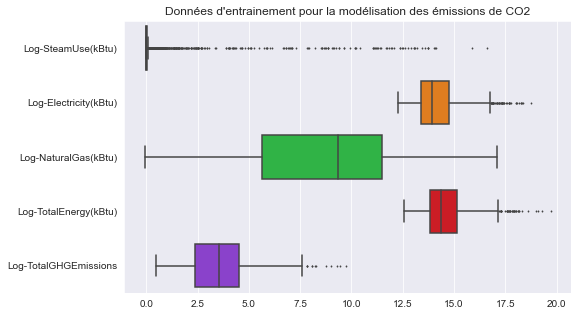

In [28]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

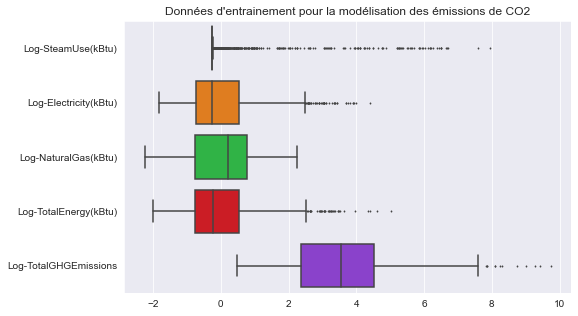

In [29]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2_std), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

___Density distribution___


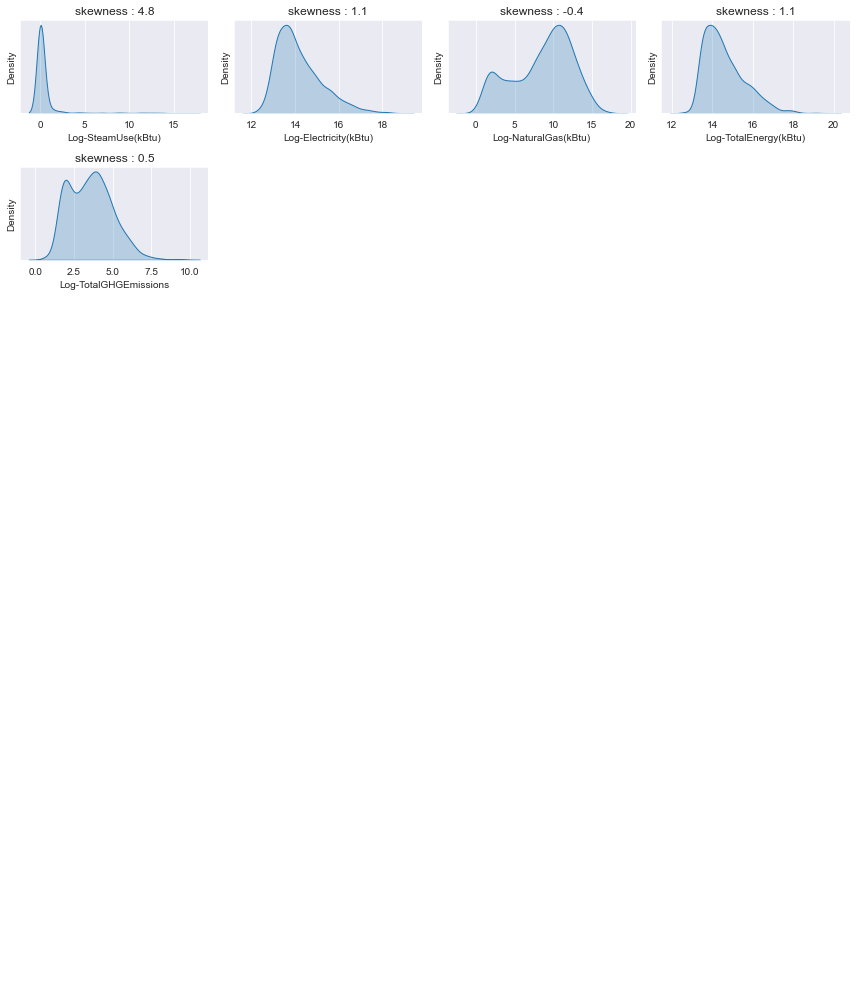

In [30]:
density(train_CO2)

___Density distribution___


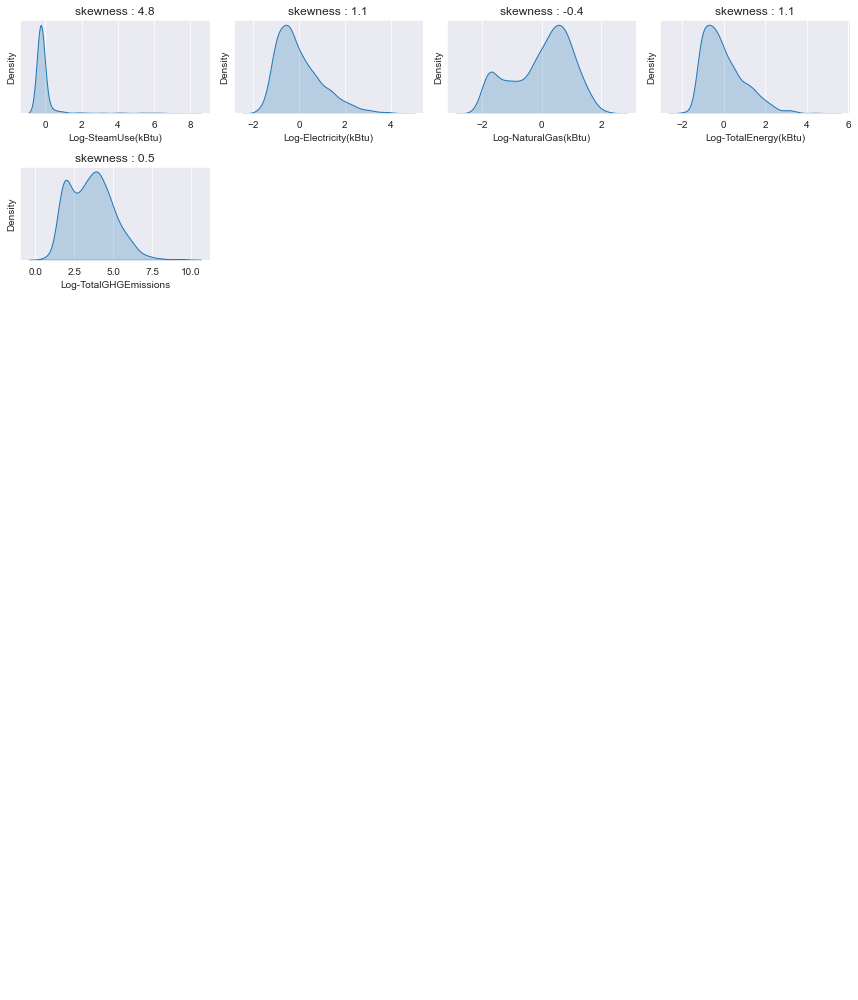

In [31]:
density(train_CO2_std)

In [32]:
path = "./model/"

# Sauvegarde des jeux de données
train_CO2_std.to_csv("{}{}".format(path, "/test/CO2/train_CO2.csv"), encoding='utf-8', index=False)
test_CO2_std.to_csv("{}{}".format(path, "/test/CO2/test_CO2.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_CO2, 'scaler_features': model_CO2_features}
filename = 'model/test/CO2/scaler_CO2.sav'
pickle.dump(model, open(filename, 'wb'))